In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    "pgf.rcfonts": False,
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    #"font.sans-serif": "Computer Modern Sans serif",
    #"font.serif": [],      
    "font.sans-serif": [],
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [4]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
data = pd.read_csv('mc_apv_extraction_output.csv', index_col=0)

In [6]:
sdata = data.sort_values(by=['std'], ascending=False)[1:62]

In [41]:
sdata.head()

,mean,std
A_inelastic,1.926332,0.120834
f_quasi,1.927100,0.039732
A_quasi,1.926465,0.030693
A_Zn,1.926456,0.030662
A_Mg,1.926416,0.029928


In [77]:
names = np.empty(0)

In [78]:
for entry in sdata.index:
    if (len(entry) > 1):
        #names = np.append(names, '$' + entry[:2] + '{' + entry[2:] + '}$')
        #names = np.append(names, entry[:1] + ' ' + entry[2:])
        names = np.append(names, entry[:1] + '(' + entry[2:] + ')')
    else:
        names = np.append(names, entry)

In [79]:
names

array(['A(inelastic)', 'f(quasi)', 'A(quasi)', 'A(Zn)', 'A(Mg)',
       'A(2211keV)', 'A(2990keV)', 'f(GDR)', 'P', 'A(trans)', 'A(nonlin)',
       'A(bb)', 'R(acc)', 'R(rc)', 'A(GDR)', 'A(Cu)', 'R(q2)',
       'A(1014keV)', 'A(0844keV)', 'A(bias)', 'f(inelastic)',
       'A(2735keV)', 'A(7228keV)', 'A(bcm)', 'R(det)', 'A(5430keV)',
       'A(beam)', 'A(7477keV)', 'f(beamline)', 'f(pions)', 'f(neutral)',
       'A(4812keV)', 'A(5668keV)', 'A(Cr)', 'f(2211keV)', 'A(Si)',
       'A(4580keV)', 'f(1014keV)', 'f(7477keV)', 'A(Fe)', 'f(7228keV)',
       'f(2990keV)', 'f(Zn)', 'f(844keV)', 'A(Mn)', 'f(5430keV)', 'A(Ti)',
       'f(Mg)', 'f(2735keV)', 'f(4812keV)', 'f(5668keV)', 'f(Cu)',
       'f(4580keV)', 'f(Mn)', 'f(Ti)', 'f(Fe)', 'f(Cr)', 'f(Si)',
       'A(raw)', 'A(neutral)', 'A(pions)'], dtype='<U32')

In [53]:
bar_range = np.arange(0.0, len(sdata['std']))
name_range = np.arange(-1.0, len(sdata['std']))

In [35]:
asym = 1.9272
stat_uncert = 0.0908

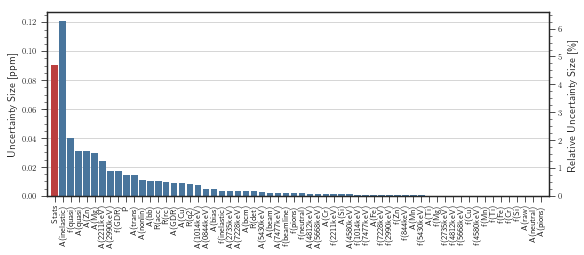

In [80]:
fig, ax = plt.subplots(figsize=(9,3.375))
ax2 = ax.twinx()
ax.bar(bar_range, sdata['std'], color=sns.xkcd_rgb['dull blue'])
ax.bar(-1, 0.0908, color=sns.xkcd_rgb['dull red']) #Stats
ax.set_xlim(-2,61)
ymin, ymax = ax.get_ylim()
ax2.set_ylim(0.0, 100.0*(ymax/asym))
ax.set_xticks(name_range)
ax.set_xticklabels(np.insert(names, 0, 'Stats'), rotation=90, horizontalalignment='center')
ax.set_ylabel('Uncertainty Size [ppm]')
ax2.set_ylabel('Relative Uncertainty Size [\%]')
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(True, which='major', axis='y')
plt.savefig('plots/uncertainty_chart_ordered.png', bbox_inches='tight')
plt.savefig('plots/uncertainty_chart_ordered.pdf', bbox_inches='tight')
plt.savefig('plots/uncertainty_chart_ordered.pgf', bbox_inches='tight')
plt.show()

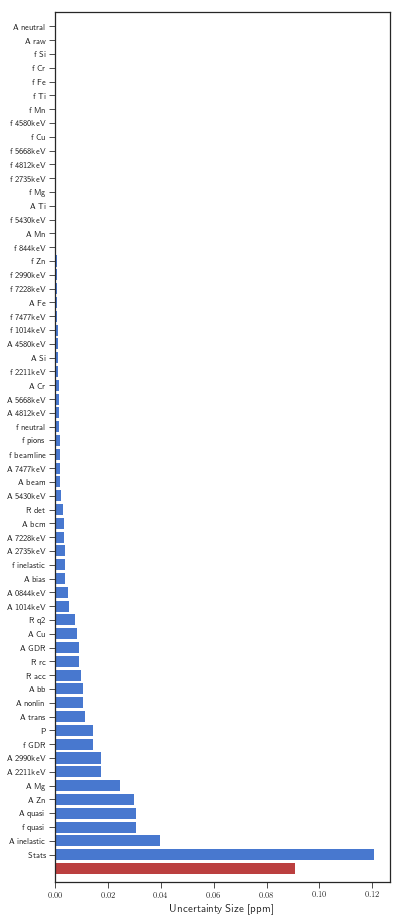

In [57]:
fig, ax = plt.subplots(figsize=(6,16))
ax.barh(bar_range, sdata['std'])
ax.barh(-1, 0.0908, color=sns.xkcd_rgb['dull red']) #Stats
ax.set_yticks(bar_range)
ax.set_yticklabels(np.insert(names, 0, 'Stats'), horizontalalignment='right')
#ax.yticks(bar_range, sdata.index, horizontalalignment='right')
ax.set_ylim(-2,61)
ax.set_xlabel('Uncertainty Size [ppm]')
#pp.savefig('plots/uncertainty_chart_horizontal_ordered.png', bbox_inches='tight')
#pp.savefig('plots/uncertainty_chart_horizontal_ordered.pdf', bbox_inches='tight')
plt.show()